In [22]:
import uproot
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks

# Signal Files
filename_signal= {
    "signal": "/eos/purdue/store/user/lingqian/minitrees2016preVFP/spinCorrInput_2016preVFP_fullrun2_eft_October2024/Nominal/ee/ee_ttto2l2nu_jet_smeft_mtt_0to700_2016preVFP.root"
}

# Background Files
filename_bkg = {
    #"ttbar_bkg10": "/eos/purdue/store/user/jthieman/2017/spinCorrInput_2017_January2023/Nominal/ee/ee_ttbarsignalplustau_fromDilepton_2017UL_10.root",
    "ttbar_bkg13": "/eos/purdue/store/user/jthieman/2016preVFP/spinCorrInput_2016preVFP_January2023/Nominal/ee/ee_ttbarsignalplustau_fromDilepton_2016ULpreVFP_13.root",
    "ttbar_bkg10": "/eos/purdue/store/user/jthieman/2016preVFP/spinCorrInput_2016preVFP_January2023/Nominal/ee/ee_ttbarsignalplustau_fromDilepton_2016ULpreVFP_10.root",
    "ttbar_bkg12": "/eos/purdue/store/user/jthieman/2016preVFP/spinCorrInput_2016preVFP_January2023/Nominal/ee/ee_ttbarsignalplustau_fromDilepton_2016ULpreVFP_12.root",
    "ttbar_bkg11": "/eos/purdue/store/user/jthieman/2016preVFP/spinCorrInput_2016preVFP_January2023/Nominal/ee/ee_ttbarsignalplustau_fromDilepton_2016ULpreVFP_11.root",
    "ttbar_bkg14": "/eos/purdue/store/user/jthieman/2016preVFP/spinCorrInput_2016preVFP_January2023/Nominal/ee/ee_ttbarsignalplustau_fromDilepton_2016ULpreVFP_14.root",
    "ttbar_bkg15": "/eos/purdue/store/user/jthieman/2016preVFP/spinCorrInput_2016preVFP_January2023/Nominal/ee/ee_ttbarsignalplustau_fromDilepton_2016ULpreVFP_15.root",
    "ttbar_bkg16": "/eos/purdue/store/user/jthieman/2016preVFP/spinCorrInput_2016preVFP_January2023/Nominal/ee/ee_ttbarsignalplustau_fromDilepton_2016ULpreVFP_16.root",
    "ttbar_bkg17": "/eos/purdue/store/user/jthieman/2016preVFP/spinCorrInput_2016preVFP_January2023/Nominal/ee/ee_ttbarsignalplustau_fromDilepton_2016ULpreVFP_17.root"
    
}

VARS = [
    'ttbar_pt', 
    'ttbar_phi', 
    'ttbar_rapidity', 
    'ttbar_eta', 
    'ttbar_delta_phi', 
    'ttbar_delta_eta', 
    'ttbar_delta_rapidity',  
    'llbar_pt', 
    'llbar_phi', 
    'llbar_rapidity', 
    'llbar_delta_phi', 
    'llbar_delta_eta', 
    'met_pt',
    'met_phi',
    'met_mass',
    'b_pt',
    'b_eta',
    'b_phi',
    'b_mass',
    'bbar_pt',
    'bbar_eta',
    'bbar_phi',
    'bbar_mass',
    'nu_pt',
    'nu_eta',
    'nu_phi',
    'nu_mass',
    'nubar_pt',
    'nubar_eta',
    'nubar_phi',
    'nubar_mass',
    'top_pt',
     'top_phi',
     'top_rapidity',
     'top_eta',
     'top_mass',
     'tbar_pt',
     'tbar_phi',
     'tbar_rapidity',
     'tbar_eta',
     'tbar_mass',
     'l_pt',
     'l_eta',
     'l_phi',
     'l_mass',
     'lbar_pt',
     'lbar_eta',
     'lbar_phi',
     'lbar_mass'   
]

# Load and preprocess signal data
df_sig_train, df_sig_test = [], []
for key, file in filename_signal.items():
    upfile = uproot.open(file)
    df = upfile["ttBar_treeVariables_step8"].arrays(VARS, library="pd")
    df["isSignal"] = np.ones(len(df))  # Label as signal
    
    # Split into training and test sets
    df_train, df_test = train_test_split(df, test_size=0.1, random_state=9)
    df_sig_train.append(df_train)
    df_sig_test.append(df_test)

df_signal_train_all = pd.concat(df_sig_train)

# Load and preprocess background data
df_bkg_train, df_bkg_test = [], []
for key, file in filename_bkg.items():
    upfile = uproot.open(file)
    df = upfile["ttBar_treeVariables_step8"].arrays(VARS, library="pd")
    df["isSignal"] = np.zeros(len(df))  # Label as background
    
    # Split into training and test sets
    df_train, df_test = train_test_split(df, test_size=0.1, random_state=9)
    df_bkg_train.append(df_train)
    df_bkg_test.append(df_test)

# Combine signal and background training sets
df_train_combined = pd.concat(df_bkg_train + df_sig_train)
dataset = df_train_combined.values

# Separate features and labels
X = dataset[:, 0:len(VARS)]
Y = dataset[:, len(VARS)]

# Standardize features
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Split into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=9)



In [23]:
sig_test=pd.concat(df_sig_test).values
X_sig_test=sig_test[:, 0:len(VARS)]
Y_sig_test=sig_test[:, len(VARS)]
X_sig_test=scaler.transform(X_sig_test)
len(X_sig_test)



13408

In [24]:
bkg_test=pd.concat(df_bkg_test).values
X_bkg_test=bkg_test[:, 0:len(VARS)]
Y_bkg_test=bkg_test[:, len(VARS)]
X_bkg_test=scaler.transform(X_bkg_test)
len(X_bkg_test)

12601

Epoch 1/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5195 - loss: 0.8025 - val_accuracy: 0.5551 - val_loss: 0.6767
Epoch 2/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5494 - loss: 0.6851 - val_accuracy: 0.5566 - val_loss: 0.6752
Epoch 3/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5590 - loss: 0.6776 - val_accuracy: 0.5572 - val_loss: 0.6748
Epoch 4/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5596 - loss: 0.6760 - val_accuracy: 0.5588 - val_loss: 0.6744
Epoch 5/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5611 - loss: 0.6755 - val_accuracy: 0.5587 - val_loss: 0.6738
Epoch 6/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5634 - loss: 0.6735 - val_accuracy: 0.5585 - val_loss: 0.6732
Epoch 7/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5623 - loss: 0.6734 - val_accuracy: 0.5586 - val_loss: 0.6723
Epoch 8/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5607 - loss: 0.6733 - val_accu

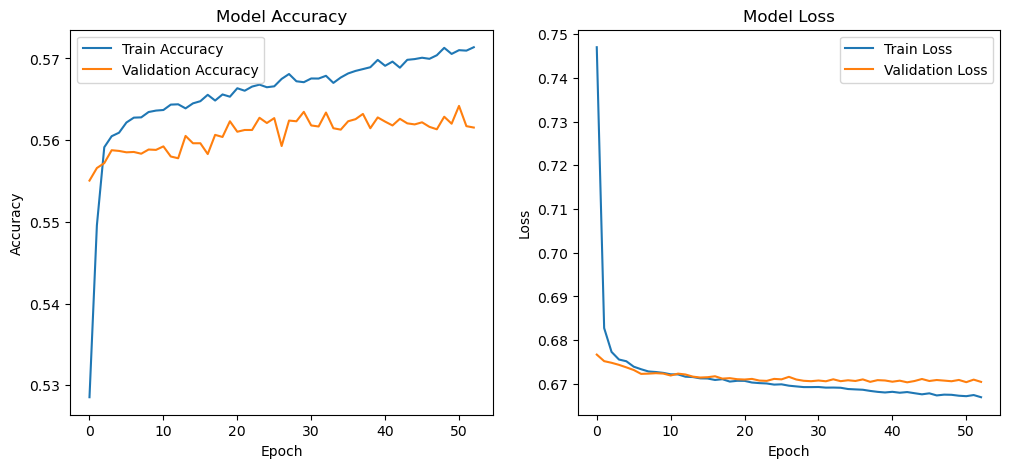

In [25]:
# Define the TensorFlow/Keras model
input_size = len(VARS)
model = models.Sequential([
    layers.Input(shape=(input_size,)),
    layers.Dense(150, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    layers.Dense(150, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=100,
    batch_size=1024,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, Y_val)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")

# Plot training history for loss and accuracy
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step


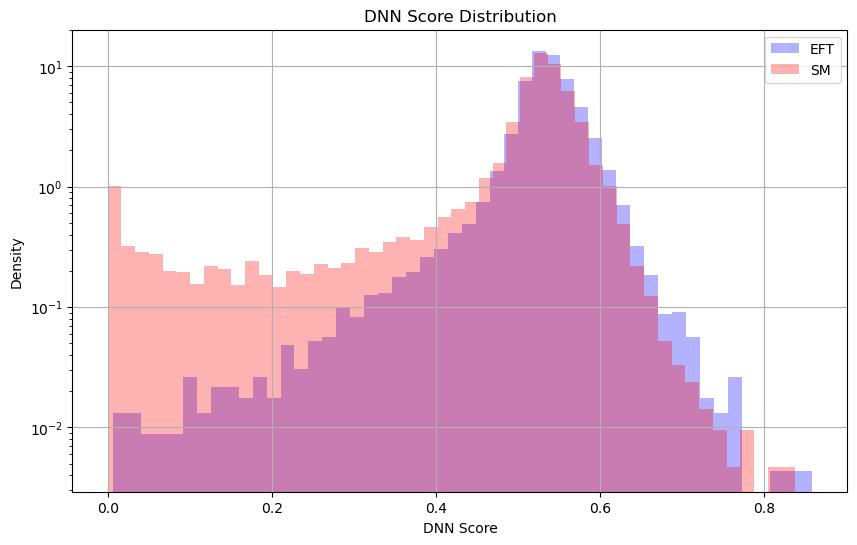

In [27]:
# Predict scores for the signal and background test sets
sig_scores = model.predict(X_sig_test).flatten()
bkg_scores = model.predict(X_bkg_test).flatten()

# Plot the DNN score distributions for signal and background
plt.figure(figsize=(10, 6))
plt.hist(sig_scores, bins=50, color='blue', alpha=0.3, label='EFT', density=True)
plt.hist(bkg_scores, bins=50, color='red', alpha=0.3, label='SM', density=True)
plt.title("DNN Score Distribution")
plt.xlabel("DNN Score")
plt.ylabel("Density")
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()